In [1]:
import argparse
import sys
sys.path.append('/home/mdecarlo/Documents/PROJETS/codes_Python/whales/whales/marine/')
from argparse import Namespace
# import cmath
import netCDF4
from netCDF4 import Dataset
import h5py
import numpy as np
import matplotlib
import xarray as xr

import matplotlib.pyplot as plt
import scipy.io
import os
import pathlib

import time
from compute_instr_corr_SWH_WHALES import compute_instr_corr_SWH_WHALES
from Retracker_MP import *
from WHALES_withRangeAndEpoch import *
from python_WHALES_launcher_marine import *

from scipy.io import matlab
# import pandas as pd
from import_weights_mat import import_weights_mat
%matplotlib inline

In [53]:
PATH = pathlib.Path('/home/datawork-cersat-public/provider/aviso/satellite/l2/saral/altika/sgdr/version_f/data/date/2013/095/')
filename = PATH/'SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113.CNES.nc'
mission = 'saral'
Path_dir = '../'
saving_directory = '/home/mdecarlo/Documents/PROJETS/codes_Python/whales/whales/'

filename_saved_voffset_smooth = saving_directory+'marine/SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113_voffset_smoothing.nc'
filename_saved_voffset = saving_directory+'marine/SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113_voffset.nc'
filename_saved_vold = saving_directory+'marine/SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113_vold.nc'
filename_saved_voffset_smooth_yang = saving_directory+'marine/SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113_vofsm_yang.nc'

# Compare old version vs new

In [77]:
ds_v1 =xr.open_dataset(filename).rename_dims({'meas_ind':'records'}).rename_vars({'meas_ind':'records'})
ds_ofsm =xr.open_dataset(filename_saved_voffset_smooth)
ds_of =xr.open_dataset(filename_saved_voffset)
ds_v3 =xr.open_dataset(filev2_40Hz) # cci v2

ds_v3_2 = xr.open_dataset(filename_saved_vold)
ds_ofsm_2 = xr.open_dataset(filename_saved_voffset_smooth_yang)

/home/mdecarlo/mambaforge/envs/seastatecci_whales/lib/python3.10/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [78]:
ds_v10 = ds_v1.where(ds_v1.qual_alt_1hz_swh==0,drop=True)
ds_v30 = ds_v3.where(ds_v1.qual_alt_1hz_swh==0,drop=True)
ds_ofsm0 = ds_ofsm.where(ds_v1.qual_alt_1hz_swh==0,drop=True)
ds_of0 = ds_of.where(ds_v1.qual_alt_1hz_swh==0,drop=True)
ds_v3_20 = ds_v3_2.where(ds_v1.qual_alt_1hz_swh==0,drop=True)
ds_ofsm_20 = ds_ofsm_2.where(ds_v1.qual_alt_1hz_swh==0,drop=True)

In [31]:
ds_v10

<xarray.Dataset>
Dimensions:                                (time: 2317, records: 40,
                                            wvf_ind: 128)
Coordinates:
  * time                                   (time) datetime64[ns] 2013-04-05T1...
    meas_ind                               (records) int8 0 1 2 3 ... 37 38 39
  * wvf_ind                                (wvf_ind) int8 0 1 2 ... 125 126 127
    lat                                    (time) float64 -81.38 ... 81.46
    lon                                    (time) float64 318.2 317.8 ... 143.0
    lon_40hz                               (time, records) float64 ...
    lat_40hz                               (time, records) float64 ...
Dimensions without coordinates: records
Data variables: (12/175)
    time_40hz                              (time, records) datetime64[ns] 201...
    surface_type                           (time) float32 0.0 0.0 ... 0.0 0.0
    rad_surf_type                          (time) float32 0.0 0.0 ... 0.0 0.0
    surf_class                             (time) float32 5.0 5.0 ... 0.0 0.0
    dist_coast                             (time) float64 -3.584e+05 ... 5.39...
    dist_coast_40hz                        (time, records) float64 -3.594e+05...
    ...                                     ...
    tracker_counter_40hz                   (time, records) float64 1.112e+08 ...
    tracker_rate_counter_40hz              (time, records) float32 0.0 ... 0.0
    pri_counter_40hz                       (time, records) float64 2.226e+04 ...
    scaling_factor_40hz                    (time, records) float64 -22.75 ......
    waveforms_40hz                         (time, records, wvf_ind) float64 0...
    ssha                                   (time) float32 nan nan ... nan nan
Attributes: (12/39)
    Conventions:                       CF-1.1
    title:                             GDR - Expertise dataset
    source:                            radar altimeter
    contact:                           CNES aviso@altimetry.fr, EUMETSAT ops@...
    reference_document:                SARAL/ALTIKA Products Handbook, SALP-M...
    mission_name:                      SARAL
    ...                                ...
    xref_orf_data:                     SRL_ORF_AXXCNE20160704_084100_20130312...
    xref_meteorological_files:         SMM_ALT_AXVCNE20110430_180000_20110504...
    xref_sst_data:                     SMM_SST_AXVCNE20130420_000000_20130405...
    xref_mfwam_data:                   SMM_WMA_AXVCNE20180703_144324_20130405...
    ellipsoid_axis:                    6378136.3
    ellipsoid_flattening:              0.0033528131778969

Text(0.5, 1.0, 'TN adjusted + wvf smoothed for LE')

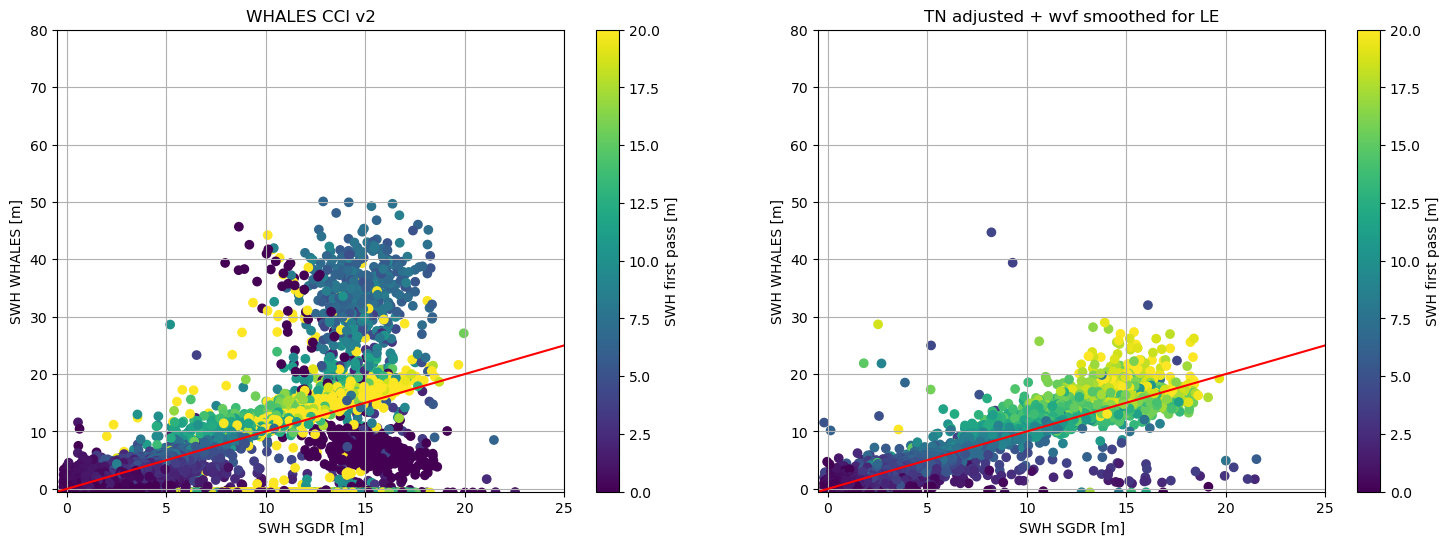

In [66]:
fig,axs = plt.subplots(1,2,figsize=(18,6))
ax = axs[0]
im=ax.scatter(ds_v10['swh_40hz'].data.flatten(),ds_v3_20['swh_WHALES_20hz'].data.flatten(),c=ds_v3_20['swh_yang_WHALES_20hz'],vmax=20)
plt.colorbar(im,ax=ax,label='SWH first pass [m]')
ax.grid(True)
ax.axline([1,1],slope=1,color='r')
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,80))
ax.set_xlabel('SWH SGDR [m]')
ax.set_ylabel('SWH WHALES [m]')
ax.set_title('WHALES CCI v2')

ax = axs[1]
im=ax.scatter(ds_v10['swh_40hz'].data.flatten(),ds_ofsm_20['swh_WHALES_20hz'].data.flatten(),c=ds_ofsm_20['swh_yang_WHALES_20hz'],vmax=20)
plt.colorbar(im,ax=ax,label='SWH first pass [m]')
ax.grid(True)
ax.axline([1,1],slope=1,color='r')
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,80))
ax.set_xlabel('SWH SGDR [m]')
ax.set_ylabel('SWH WHALES [m]')
ax.set_title('TN adjusted + wvf smoothed for LE')

LinregressResult(slope=1.0046821679575937, intercept=0.27662857864114, rvalue=0.7252756869149987, pvalue=0.0, stderr=0.00314045930387231, intercept_stderr=0.012841529353283478)
LinregressResult(slope=0.7480353152368021, intercept=0.866807988081375, rvalue=0.7825056342043905, pvalue=0.0, stderr=0.0019605242933041435, intercept_stderr=0.008010590421553904)
LinregressResult(slope=1.014910569964492, intercept=0.19766843448181248, rvalue=0.9671216173963657, pvalue=0.0, stderr=0.0008790160503778003, intercept_stderr=0.003591419554049904)


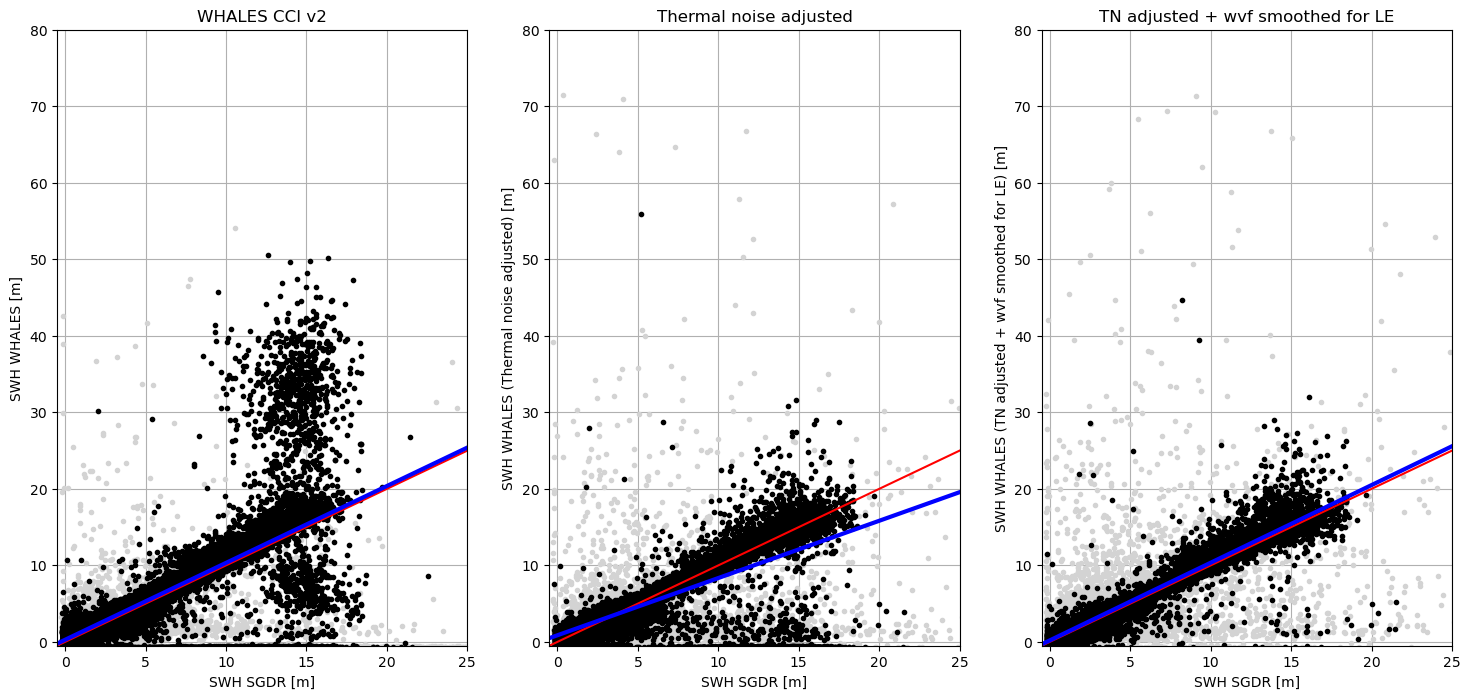

In [43]:
from scipy import stats

fig,axs = plt.subplots(1,3,figsize=(18,8))
ax = axs[0]
ax.plot(ds_v1['swh_40hz'],ds_v3['swh_WHALES_20hz'],'.',color='lightgrey')
ax.plot(ds_v10['swh_40hz'],ds_v30['swh_WHALES_20hz'],'.k')
ax.grid(True)
ax.axline([1,1],slope=1,color='r')
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,80))
ax.set_xlabel('SWH SGDR [m]')
ax.set_ylabel('SWH WHALES [m]')
ax.set_title('WHALES CCI v2')

X1D0 = ds_v10['swh_40hz'].data.flatten()
Y1D0 = ds_v30['swh_WHALES_20hz'].data.flatten()

ind = np.where((np.isfinite(X1D0))&(np.isfinite(Y1D0)))[0]

res = stats.linregress(X1D0[ind],Y1D0[ind])
rval = res.rvalue
rinter = res.intercept
rslope = res.slope
print(res)

ax.axline([0,rinter],slope=rslope,color='b',lw=3)

# --------
ax = axs[1]
ax.plot(ds_v1['swh_40hz'],ds_of['swh_WHALES_20hz'],'.',color='lightgrey')
ax.plot(ds_v10['swh_40hz'],ds_of0['swh_WHALES_20hz'],'.k')
ax.axline([1,1],slope=1,color='r')
ax.grid(True)
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,80))
ax.set_xlabel('SWH SGDR [m]')
ax.set_ylabel('SWH WHALES (Thermal noise adjusted) [m]')
ax.set_title('Thermal noise adjusted')

X1D0 = ds_v10['swh_40hz'].data.flatten()
Y1D0 = ds_of0['swh_WHALES_20hz'].data.flatten()

ind = np.where((np.isfinite(X1D0))&(np.isfinite(Y1D0)))[0]

res = stats.linregress(X1D0[ind],Y1D0[ind])
rval = res.rvalue
rinter = res.intercept
rslope = res.slope
print(res)

ax.axline([0,rinter],slope=rslope,color='b',lw=3)

# --------
ax = axs[2]
ax.plot(ds_v1['swh_40hz'],ds_ofsm['swh_WHALES_20hz'],'.',color='lightgrey')
ax.plot(ds_v10['swh_40hz'],ds_ofsm0['swh_WHALES_20hz'],'.k')
ax.axline([1,1],slope=1,color='r')
ax.grid(True)
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,80))
ax.set_xlabel('SWH SGDR [m]')
ax.set_ylabel('SWH WHALES (TN adjusted + wvf smoothed for LE) [m]')
ax.set_title('TN adjusted + wvf smoothed for LE')

X1D0 = ds_v10['swh_40hz'].data.flatten()
Y1D0 = ds_ofsm0['swh_WHALES_20hz'].data.flatten()

ind = np.where((np.isfinite(X1D0))&(np.isfinite(Y1D0)))[0]

res = stats.linregress(X1D0[ind],Y1D0[ind])
rval = res.rvalue
rinter = res.intercept
rslope = res.slope
print(res)

ax.axline([0,rinter],slope=rslope,color='b',lw=3)


(-0.5, 25.0)

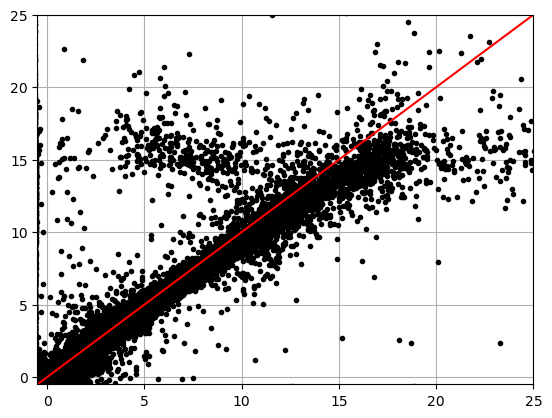

In [44]:
plt.figure()
ax =plt.gca()
ax.plot(ds_v30['swh_WHALES_20hz'],ds_ofsm0['swh_WHALES_20hz'],'.k')
ax.axline([1,1],slope=1,color='r')
ax.grid(True)
ax.set_xlim((-0.5,25))
ax.set_ylim((-0.5,25))

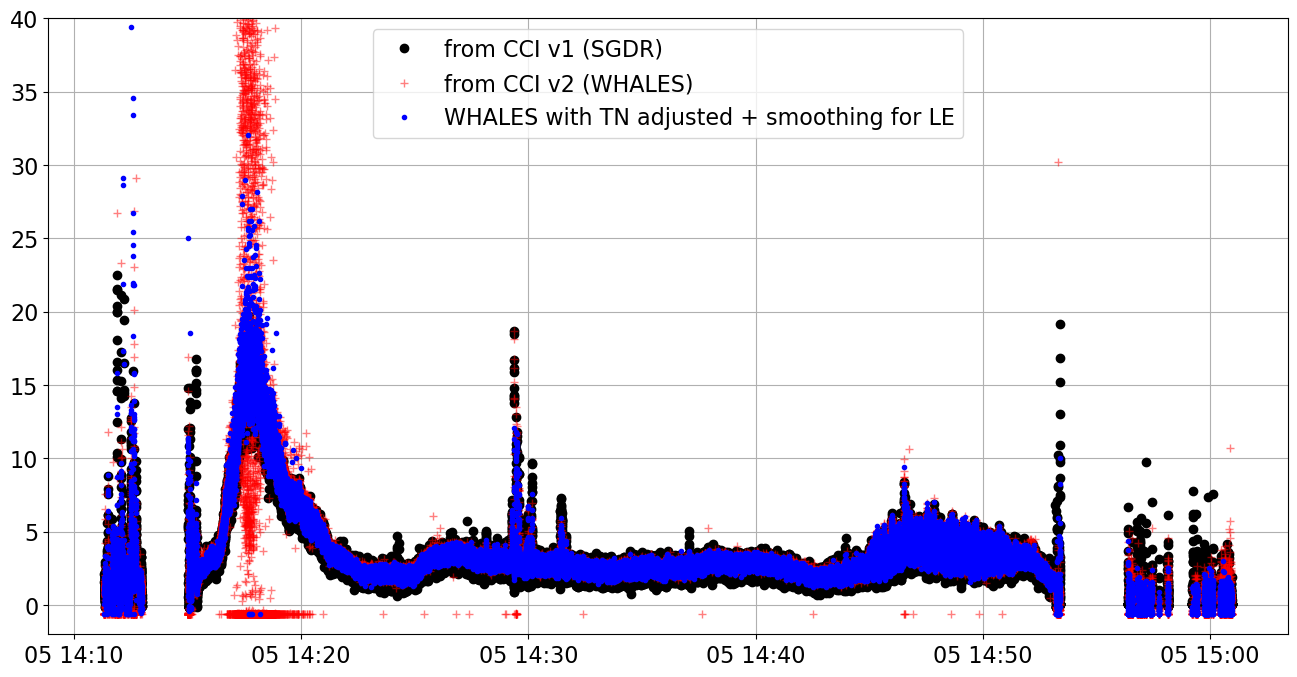

In [147]:
plt.figure(figsize=(16,8))
sc0 = plt.plot(ds_v10['time_40hz'],ds_v10['swh_40hz'],'ok',label='from CCI v1 (SGDR)');
sc1 = plt.plot(ds_v10['time_40hz'],ds_v30['swh_WHALES_20hz'],'+r',alpha=0.5,label='from CCI v2 (WHALES)');
# plt.plot(ds_v10['time_40hz'],ds_of0['swh_WHALES_20hz'],'xm');
sc2 = plt.plot(ds_v10['time_40hz'],ds_ofsm0['swh_WHALES_20hz'],'.b',label='WHALES with TN adjusted + smoothing for LE');
# plt.plot(ds01.isel(time=slice(620,680))['time_40hz'],ds03.isel(time=slice(620,680))['swh_WHALES_20hz'],'.b',alpha=0.5);
plt.ylim((-2,40))
plt.grid(True)
plt.legend(handles=[sc0[0],sc1[0],sc2[0]])

In [ ]:
fig,axs = plt.subplots()

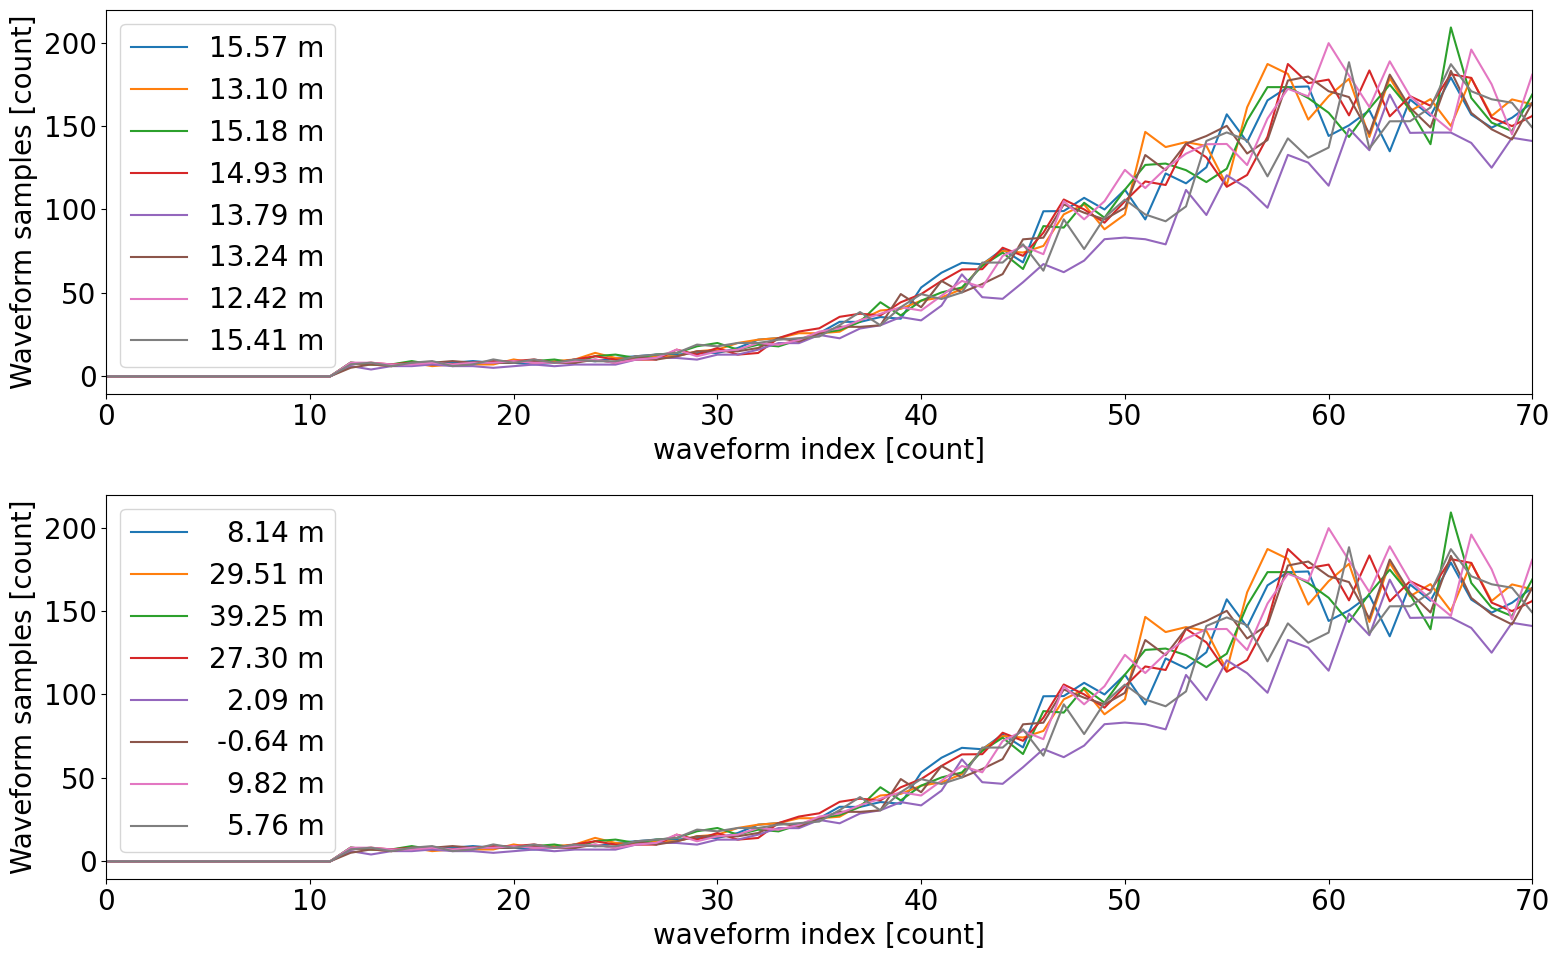

In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'figure.figsize':(16,8),'font.size': 20})

ds1 = ds_v1.isel(time=slice(378,380),records=slice(6,46,10)).stack(fasttime=['time','records'])
# ds2 = ds02.isel(time=slice(378,380),records=slice(6,46,10)).stack(fasttime=['time','records'])
ds3 = ds_v3.isel(time=slice(378,380),records=slice(6,46,10)).stack(fasttime=['time','records'])

fig,axs = plt.subplots(2,1,figsize=(16,10))
ax=axs[0]
ds1['waveforms_40hz'].plot.line(x='wvf_ind',ax=ax);
# ds1['waveforms_40hz'].plot.line(x='wvf_ind',label=ds1['swh_40hz'].data);
lbs = [f'{fi:.2f}'+' m' for fi in ds1["swh_40hz"].data]
leg = ax.legend(lbs)

shift = max([t.get_window_extent().width for t in leg.get_texts()])
for t in leg.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift-t.get_window_extent().width,0))

ax.set_xlim((0,70))
# plt.show()

# plt.figure(figsize=(16,8))
ax =axs[1]
# ds1['waveforms_40hz'].plot.line(x='wvf_ind',label=ds3['swh_WHALES_20hz'].data);
ds1['waveforms_40hz'].plot.line(x='wvf_ind',ax=ax);
lbs = [f'{fi:.2f}'+' m' for fi in ds3["swh_WHALES_20hz"].data]
leg = ax.legend(lbs)

shift = max([t.get_window_extent().width for t in leg.get_texts()])
for t in leg.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((shift-t.get_window_extent().width,0))


ax.set_xlim((0,70))

plt.tight_layout()
# ax =axs[2]
# # ds1['waveforms_40hz'].plot.line(x='wvf_ind',label=ds3['swh_WHALES_20hz'].data);
# ds1['waveforms_40hz'].plot.line(x='wvf_ind',label=ds3['swh_WHALES_20hz'].data,ax=ax);
# ax.legend()
# ax.set_xlim((0,70))


In [109]:
A =66.658
B = 0.3
C = -B

print(f'{A:10.2f}')
print(f'{B:10.2f}')
print(f'{C:10.2f}')
print(np.array(lbs))width

     66.66
      0.30
     -0.30
['                8.14' '               29.51' '               39.25'
 '               27.30' '                2.09' '               -0.64'
 '                9.82' '                5.76']


In [153]:
FORM = 'YYYY/MM/era_5-copernicus__YYYYMMDD.nc'
FORM2 = 'YYYY/MM/era_5-copernicus__YYYYMMdd.nc'

mo = 'dd'
ye=2020
mm = 11
if mo in FORM:
    print('in Form')
if mo in FORM2:
    print('in Form2')
    
print(FORM.replace('YYYY',f'{ye:04d}').replace('MM',f'{mm:02d}'))

in Form2
2020/11/era_5-copernicus__202011DD.nc


# Try run while debug

## functions

In [5]:
def moving_average(a, n):
    a = np.concatenate((np.zeros((n + 1,)), a, np.zeros((n,))));
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def wf_reader(filename):
    S = netCDF4.Dataset(filename, 'r')

    return S


def myfun_brown_Sigma(incognita,data)  :
    """
    Brown-Hayne functional form, The unknown parameters in this version (17 Dec 2013) are Epoch, Sigma and Amplitude, where 
    sigma=( sqrt( (incognita(2)/(2*0.3)) ^2+SigmaP^2) ) is the rising time of the leading edge

    For the explanation of the terms in the equation, please check "Coastal Altimetry" Book

    """

    ydata=data[0] #Waveform coefficients
    Gamma=data[1]
    Zeta=data[2]
    xdata=data[3]  #Epoch
    SigmaP=data[4]
    c_xi=data[5]  #Term related to the slope of the trailing edge
    weights=data[6]  #Weights to apply to the residuals
    weightflag=data[7]

    fff = ( incognita[2]/2*np.exp((-4/Gamma)*(np.sin(Zeta))**2) \
    * np.exp (-  c_xi*( (xdata-incognita[0])-c_xi*incognita[1]**2/2) ) \
    *   (  1+scipy.special.erf( ((xdata-incognita[0])-c_xi*incognita[1]**2)/((np.sqrt(2)*incognita[1]))  ) ) \
    )


    cy= (   weights *  ((ydata - fff) **2)).sum()

    return cy

def NMbrown_Sigma(xdata,ydata,Zeta,altitude,initial_conditions,mission,weights,weightflag) :
    #Nelder-Mead fit of a waveform modelled by the Brown-Hayne functional
    #form. For naming explanation see coastal altimetry book

    #IT NEEDS:
        #1) xdata in NANOSECONDS (ex. xdata=[0*tau:1:127*tau])
        #2) ydata (waveform coefficient) in normalized units
        #3) Off-nadir angle in radians

    #OUTPUT:
        #1) x: vector of the estimated parameters
        #2) Wt: fitted waveform
        #3) exitflag: exit flag to check convergence
        #4) Err: Fitting Error on the portion of waveform given to the function
        #5) SWH: Significant Wave Height


    incognita=initial_conditions

    c=3.0*(10**8) #Light speed
    H=altitude
    Ri=6378.1363*(10**3) #Earth radius

    #The following parameters should change according to the mission
    if mission.lower() == 'envisat':
        tau=3.125 #gate spacing in ns
        Theta=1.35 *np.pi/180 #modified http://www.aviso.oceanobs.com/fileadmin/documents/OSTST/2010/oral/PThibaut_Jason2.pdf  % The antenna 3dB bandwidth (degrees transformed in radians)
        SigmaP=0.53*tau #from Gomez Enri 2006. Otherwise use:%1.6562; %ns =0.53*3.125ns
    if mission.lower() == 'jason2' or mission.lower() == 'jason1' or mission.lower() == 'jason3':           
        tau=3.125
        Theta=1.29 *np.pi/180
        SigmaP=0.513*tau
    if mission.lower() == 'ers2_r' or mission.lower() == 'ers2_r_2cm':           
        tau=3.03
        Theta=1.3 *np.pi/180
        SigmaP=0.513*tau    

    if mission.lower() == 'saral' or mission.lower() == 'saral_igdr':           
        tau=3.125*320/480
        Theta=0.605 *np.pi/180
        SigmaP=0.513*tau
    if mission.lower() == 'cs2_lrm':
        tau=3.125 #gate spacing in ns
        Theta=1.1992 *np.pi/180 #modified http://www.aviso.oceanobs.com/fileadmin/documents/OSTST/2010/oral/PThibaut_Jason2.pdf  % The antenna 3dB bandwidth (degrees transformed in radians)
        SigmaP=0.513*tau             


    Gamma=0.5 * (1/math.log(2))*np.sin(Theta)*np.sin(Theta) # antenna beamwidth parameter

    b_xi = np.cos (2*Zeta) - ((np.sin(2*Zeta))**2)/Gamma
    a=( (4/Gamma)*(c/H) * 1/(1+H/Ri))
    c_xi=b_xi* ( (4/Gamma)*(c/H) * 1/(1+H/Ri))

    a=a/1000000000 #/ns
    c_xi=c_xi/1000000000 #1/ns
    #c_xi_gates=c_xi*tau #in gate units
    xopt = minimize(myfun_brown_Sigma, incognita, args=((ydata,Gamma,Zeta,xdata,SigmaP,c_xi,weights,weightflag),) ,\
    method='Nelder-Mead',options={'disp': False})


    if xopt.success == True:
        exitflag=1 #xopt[4]
    else:
        exitflag=0

    #Calculation of the fitted waveform
    x=xopt.x #This are the parameters estimated in minimised

    SWH_squared=( - SigmaP**2 + x[1]**2 )
    if SWH_squared>=0 :    
        SWH=cmath.sqrt( np.abs(- SigmaP**2 + x[1]**2)  ).real * (2*0.3)
    else:
        SWH=- cmath.sqrt( np.abs(- SigmaP**2 + x[1]**2) ).real * (2*0.3)
    SigmaS=SWH/(2*0.3) 
    Sigma=cmath.sqrt(SigmaS**2+SigmaP**2).real
    t=xdata-x[0]
    v=c_xi*(t-c_xi*(Sigma**2)/2)
    u=np.divide( (t-c_xi*(Sigma**2)) , (np.sqrt(2)*Sigma) )
    A=x[2]/2*np.exp((-4/Gamma)*(np.sin(Zeta))**2)
    Wt=A*np.exp(-v)*(1+scipy.special.erf(u))



    if np.size(ydata)>0: 
        Err=np.sqrt( 1./np.size(ydata) * np.sum( (ydata-Wt)**2 ))  #Fitting Error
    else:
        Err=np.nan

    return x, Wt, exitflag, Err, SWH

def Conversion_NMbrown(x,mission) :

    # This function converts the Epoch estimated by NMbrown_Sigma into an Epoch referred to the nominal point of the mission
    # In inputs it takes x, the vector of parameters estimated by NMbrown_Sigma            

    c=0.3 # Light speed divided by a factor 10^-9

    # THIS IS MISSION DEPENDENT!!!
    if mission.lower() == 'envisat':
        tau=3.125 #gate spacing in ns
        nominal_tracking_gate=45
    if mission.lower() == 'saral' or mission.lower() == 'saral_igdr':
        tau=3.125*320/480 #gate spacing in ns
        nominal_tracking_gate=51            
    if mission.lower() == 'jason2' or mission.lower() == 'jason1' or mission.lower() == 'jason3': 
        tau=3.125
        nominal_tracking_gate=31
    if mission.lower() == 'ers2_r' or mission.lower() == 'ers2_r_2cm': 
        tau=3.03
        nominal_tracking_gate=33
    if mission.lower() == 'cs2_lrm':
        tau=3.125 #gate spacing in ns
        nominal_tracking_gate=64            

    t0=x[0] # ns
    Sigma=x[1]
    Au=x[2]

    #============== Calculate Epoch from t0=========================
    Epoch=t0 - nominal_tracking_gate*tau;  
    Epoch=Epoch*(c/2)  #m conversion from ns to meters(1gate=0.468m->c*tau/2)

    return(Epoch,t0,Sigma,Au)

def akima_interpolate(x, y, x_new, axis=-1, out=None):
    """Return interpolated data using Akima's method.

    This Python implementation is inspired by the Matlab(r) code by
    N. Shamsundar. It lacks certain capabilities of the C implementation
    such as the output array argument and interpolation along an axis of a
    multidimensional data array.

    Parameters
    ----------
    x : array like
    1D array of monotonically increasing real values.
    y : array like
    N-D array of real values. y's length along the interpolation
    axis must be equal to the length of x.
    x_new : array like
    New independent variables.
    axis : int
    Specifies axis of y along which to interpolate. Interpolation
    defaults to last axis of y.
    out : array
    Optional array to receive results. Dimension at axis must equal
    length of x.

    Examples
    --------
    >>> interpolate([0, 1, 2], [0, 0, 1], [0.5, 1.5])
    array([-0.125,  0.375])
    >>> x = np.sort(np.random.random(10) * 10)
    >>> y = np.random.normal(0.0, 0.1, size=len(x))
    >>> z = interpolate(x, y, x)
    >>> np.allclose(y, z)
    True
    >>> x = x[:10]
    >>> y = np.reshape(y, (10, -1))
    >>> z = np.reshape(y, (10, -1))
    >>> interpolate(x, y, x, axis=0, out=z)
    >>> np.allclose(y, z)
    True

    """
    x = np.array(x, dtype=np.float64, copy=True)
    y = np.array(y, dtype=np.float64, copy=True)
    xi = np.array(x_new, dtype=np.float64, copy=True)

    if axis != -1 or out is not None or y.ndim != 1:
        raise NotImplementedError("implemented in C extension module")

    if x.ndim != 1 or xi.ndim != 1:
        raise ValueError("x-arrays must be one dimensional")

    n = len(x)
    if n < 3:
        raise ValueError("array too small")
    if n != y.shape[axis]:
        raise ValueError("size of x-array must match data shape")

    dx = np.diff(x)
    if any(dx <= 0.0):
        raise ValueError("x-axis not valid")

    if any(xi < x[0]) or any(xi > x[-1]):
        raise ValueError("interpolation x-axis out of bounds")

    m = np.diff(y) / dx
    mm = 2.0 * m[0] - m[1]
    mmm = 2.0 * mm - m[0]
    mp = 2.0 * m[n - 2] - m[n - 3]
    mpp = 2.0 * mp - m[n - 2]

    m1 = np.concatenate(([mmm], [mm], m, [mp], [mpp]))

    dm = np.abs(np.diff(m1))
    f1 = dm[2:n + 2]
    f2 = dm[0:n]
    f12 = f1 + f2

    ids = np.nonzero(f12 > 1e-9 * np.max(f12))[0]
    b = m1[1:n + 1]

    b[ids] = (f1[ids] * m1[ids + 1] + f2[ids] * m1[ids + 2]) / f12[ids]
    c = (3.0 * m - 2.0 * b[0:n - 1] - b[1:n]) / dx
    d = (b[0:n - 1] + b[1:n] - 2.0 * m) / dx ** 2

    bins = np.digitize(xi, x)
    bins = np.minimum(bins, n - 1) - 1
    bb = bins[0:len(xi)]
    wj = xi - x[bb]

    return ((wj * d[bb] + c[bb]) * wj + b[bb]) * wj + y[bb]

In [70]:
def first_pass_retracking_ALES(D,xdata,x_initial,sigma_initial,ampl_initial,gate1,gate2,Err_tolerance_vector,startgate,mission,total_gate_number):
    x1_yang=np.empty(3)*np.nan     #Initialisation of vector of the estimated parameters (yang corresponds to the first retracking, restricted to the leading edge)
    Err_yang=1
    
    # STEP 5.2: FIRST PASS RETRACKING
    tol_Err_yang=Err_tolerance_vector
    x1_yang[2]=0 #initialising to start the while cycle
    growingdue=0 #variation of the number of gates considered
    
    while Err_yang>tol_Err_yang and (gate2+growingdue)<total_gate_number and sigma_initial<100 :
    #while cycle: check on the Fitting Error, check that the number of available gates is not being exceeding, check that initial condition has been defined as a number (sigma_inital<100, could be removed)    
        weightflag=0  #No weights are used in the first (leading-edge only) retracker
        this_weights=np.ones(np.shape(xdata))

        x1_yang, Wt_yang, exitflag_yang, Err, SWH = NMbrown_Sigma(xdata[startgate:gate2+growingdue+1] , D[startgate:gate2+growingdue+1],\
                inputs['xi']*math.pi/180,inputs['hsat'],\
                np.array([x_initial, sigma_initial, ampl_initial]),mission,this_weights[startgate:gate2+growingdue+1],weightflag)


        if gate2>gate1+1 and gate1>0 and np.size(Wt_yang)>1 and gate1>startgate and gate2>startgate+1 :
            # Fitting Error computed on the leading edge
            Err_yang=np.sqrt( 1/float(gate2-gate1-1) * np.sum( (D[gate1+1:gate2]-Wt_yang[gate1-(startgate-1):gate2-startgate])**2 ))

        outp['Wt_all_yang'][startgate:gate2+growingdue+1] = Wt_yang
        #If the fitted waveforms only contains zeroes,
        #it's not the good one...
        if np.sum(Wt_yang==0)==np.size(Wt_yang):
            Err_yang=1

        if exitflag_yang==0: 
        #if convergence is not reached, we might need more gates (growingdue+2) 
            growingdue=growingdue+2
        else: #else then we can stop the while cycle
            break

    print('growingdue = ',growingdue)
    del(growingdue)    

    if np.isnan(x1_yang[2])==0 :
        Epoch_yang,Tau_yang,Sigma_yang,Au_yang = Conversion_NMbrown(x1_yang,mission)
        SWH_yang=SWH #SWH after the first retracking              
        Sigma0_yang=10*np.log10(Au_yang*normalize_factor) #De-normalise the amplitude and save it as db 
    else:
            Epoch_yang=np.nan 
            Tau_yang=np.nan
            SWH_yang=np.nan
            Au_yang=np.nan
            Sigma0_yang=np.nan 
            Sigma_yang=np.nan
    
    return Epoch_yang, Tau_yang, SWH_yang, Au_yang, Sigma0_yang, Sigma_yang,x1_yang,Err_yang

In [39]:
def get_stopgate(SWH_yang,ALEScoeff0,ALEScoeff1,x1_yang,tau,total_gate_number,xdata,gate2):
    if SWH_yang<15:
        gateafterLE=np.ceil(ALEScoeff0+ALEScoeff1*np.abs(SWH_yang))                  
        stopgate=np.ceil(x1_yang[0]/tau)+gateafterLE            
    else: #we consider 15 m as the maximum possible SWH value
        gateafterLE=np.ceil(ALEScoeff0+ALEScoeff1*15)                   
        stopgate=np.ceil(x1_yang[0]/tau)+gateafterLE
    if stopgate<=total_gate_number: #if we need more than the actual number of gates, we use the full waveform
        pass
    else:
        stopgate=total_gate_number-1 #-1 because then we have the condition "(stopgate+growingdue)<total_gate_number"

    if xdata[-1]<stopgate*tau : #if the computed stopgate is bigger than the actual length of the vector
                                #(can happen for very high SWH), then stopgate will be the end of the waveform
        stopgate=np.size(xdata)-1
    else: # FIND ON THE OVERSAMPLED WAVEFORM THE POSITION CORRESPONDING TO THE COMPUTED STOPGATE
        stopgate=np.nonzero(xdata==stopgate*tau)[0]-1; #-1 because the first element of xdata is 0 and not 3.125

    #we don't want to stop before the end of the leading edge
    if stopgate>=gate2:
        pass
    else:
        stopgate=gate2

    if np.isscalar(stopgate) == False: #Addition to check that the output of stopgate is a scalar
        stopgate=stopgate[0]
    
    return stopgate

## Start

In [133]:
# %debug python_whales_launch(filename,mission,saving_directory+'marine/',Path_dir=saving_directory)
saving_name = os.path.join(saving_directory+'marine/', os.path.basename(filename))
Path_dir = saving_directory
cal2 = 'on'

add_instr_corr_SWH = 'no'
import_weights = 'yes'

saral_filter = np.loadtxt(os.path.join(Path_dir,'cal2/ALK_MeanFilter'))
saral_filter_norm = saral_filter / np.mean(saral_filter)

my_path_instr_corr_SWH = ''
my_path_weights = os.path.join(Path_dir,'weights/weights_alt.mat')

try:
    mat_weights = matlab.loadmat(my_path_weights)
    residual_std = np.squeeze(mat_weights['residual_tot'])
    flag_edges = np.squeeze(mat_weights['flag_edges'])
except:
    # H5PY
    import h5py
    print(my_path_weights)
    mat_weights = h5py.File(my_path_weights,'r')
    residual_std=np.transpose(mat_weights['residual_tot'][:])
    flag_edges=np.transpose(mat_weights['flag_edges'][:])
    

/home/mdecarlo/Documents/PROJETS/codes_Python/whales/whales/weights/weights_alt.mat


In [7]:
saral_filter_norm.shape
residual_std.shape
flag_edges.shape

(21, 128)

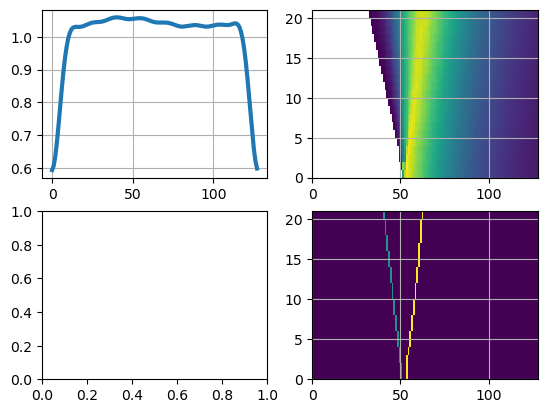

In [11]:
fig,axs=plt.subplots(2,2)
ax=axs[0,0]
ax.plot(saral_filter_norm,'-',lw=3)
ax.grid(True)

ax=axs[0,1]
ax.pcolormesh(residual_std)
ax.grid(True)

ax=axs[1,1]
ax.pcolormesh(flag_edges)
ax.grid(True)

In [134]:
# 3) Launcher 
# 3.1 SGDR
counting = 0
counting_swh = 0

S = wf_reader(filename)
S_time = np.ma.getdata(S.variables['time_40hz'][:])
S_height = np.ma.getdata(S.variables['alt_40hz'][:])
S_swh = np.ma.getdata(S.variables['swh_40hz'][:])
S_tracker = np.ma.getdata(S.variables['tracker_40hz'][:])
S_range = np.ma.getdata(S.variables['range_40hz'][:])
S_waveform = np.ma.getdata(S.variables['waveforms_40hz'][:])
S_lat = np.ma.getdata(S.variables['lat_40hz'][:])
S_lon = np.ma.getdata(S.variables['lon_40hz'][:])
S_landmask = np.ma.getdata(S.variables['surface_type'][:])

# OFF NADIR ANGLE FROM WAVEFORM
# S_offnadir=np.ma.getdata( S.variables['off_nadir_angle_wf_40hz'][:] )
##Unrealistic offnadir angles of value higher than 0.3 degrees, which would affect Range estimation (Dorandeau et al. 2004) are removed
##Note that in Altika there are some values put as 3267, where the retracking of the offnadir likely failed
# index_offnadir=np.where(np.abs(S_offnadir)>0.3)[0]
# S_offnadir[index_offnadir]=0.
##Off nadir angle field is filtered with an alongtrack filter of 30 seconds as suggested by Amarouche et al. (2004)

# OFF NADIR ANGLE FROM PLATFORM
S_offnadir = np.ma.getdata(S.variables['off_nadir_angle_pf'][:])
# This field is at 1-Hz, so it has to be reshaped
S_offnadir = np.transpose(np.tile(S_offnadir, (np.shape(S_time)[1], 1)))

S_atmos_corr = np.ma.getdata(S.variables['atmos_corr_sig0'][:])
# This field is at 1-Hz, so it has to be reshaped
S_atmos_corr = np.transpose(np.tile(S_atmos_corr, (np.shape(S_time)[1], 1)))

S_scaling_factor = np.ma.getdata(S.variables['scaling_factor_40hz'][:])


In [135]:
# WHALES RETRACKING ATTEMPT
landmask = np.empty(np.shape(S_time)) * np.nan

swh_WHALES = np.empty(np.shape(S_time)) * np.nan

Err_WHALES = np.empty(np.shape(S_time)) * np.nan
Epoch_WHALES = np.empty(np.shape(S_time)) * np.nan
Amplitude_WHALES = np.empty(np.shape(S_time)) * np.nan

sigma0_WHALES = np.empty(np.shape(S_time)) * np.nan

time_20hz = np.empty(np.shape(S_time)) * np.nan

altitude = np.empty(np.shape(S_time)) * np.nan
range_WHALES = np.empty(np.shape(S_time)) * np.nan

swh_WHALES_instr_corr = np.empty(np.shape(S_time)) * np.nan


/tmp/ipykernel_23823/546179360.py:2: RuntimeWarning: invalid value encountered in multiply
  landmask = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:4: RuntimeWarning: invalid value encountered in multiply
  swh_WHALES = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:7: RuntimeWarning: invalid value encountered in multiply
  Epoch_WHALES = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:8: RuntimeWarning: invalid value encountered in multiply
  Amplitude_WHALES = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:10: RuntimeWarning: invalid value encountered in multiply
  sigma0_WHALES = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:12: RuntimeWarning: invalid value encountered in multiply
  time_20hz = np.empty(np.shape(S_time)) * np.nan
/tmp/ipykernel_23823/546179360.py:14: RuntimeWarning: invalid value encountered in multiply
  altitude = np.empty(np.shape(S_time)) * np.n

In [136]:
index_waveforms_row = 378 #620 #378 #
index_waveforms_col = 6

# Inside the loop over waveforms
antenna_ref_point_correction = 0.18092  # See for example: http://www.aviso.oceanobs.com/fileadmin/documents/data/tools/JA2_GDR_D_release_note.pdf
            # The full reference is  Desjonquerès, J. D., and N. Picot. "OSTM/JASON-2 absolute bias technical note." CNES internal document TP3-JPOS3-NT-1627-CNES (2011).


inputs = {}

if cal2 == 'on':
    inputs['waveform'] = S_waveform[index_waveforms_row,
                        index_waveforms_col, :] / saral_filter_norm
else:
    inputs['waveform'] = S_waveform[index_waveforms_row,
                        index_waveforms_col, :]
    
# ' raw range in [m] '
inputs['uralt'] = S_tracker[index_waveforms_row, index_waveforms_col]

# ' hsat '
inputs['hsat'] = S_height[index_waveforms_row, index_waveforms_col]
# ' mission '
inputs['mission'] = 'saral'

# ' off nadir angle in degree '
inputs['xi'] = S_offnadir[index_waveforms_row, index_waveforms_col]

if import_weights == 'yes':
    inputs['weights_flag'] = flag_edges
    inputs['weights'] = residual_std


In [10]:
retracker = WHALES_withRangeAndEpoch(inputs)

swh_WHALES = retracker.SWH
Epoch_WHALES = retracker.Epoch

sigma0_WHALES = retracker.Amplitude + S_atmos_corr[index_waveforms_row, index_waveforms_col] + S_scaling_factor[index_waveforms_row, index_waveforms_col]

range_WHALES = retracker.range

Amplitude_WHALES = retracker.Norm_Amplitude

In [11]:
print(retracker.SWH,retracker.SWH_yang)
print(retracker.Epoch)
print(retracker.gate1,retracker.gate2)

14.881577399946115 16.966048863831556
0.2583075526885835
31 59


## Inside retrack_MP

In [140]:
# def retrack_MP(self):

mission = inputs['mission']
waveform = np.array(inputs['waveform'])


# IN THE FOLLOWING LINES; THE SPECIFIC CHARACTERISTICS OF EACH MISSIONS ARE DEFINED
# NOTE THAT:
# Waveforms are not oversampled, because Jason has been tested with the addition of 
# weights, whose distribution might change if we oversample the waveform.             

# elif mission.lower() == 'saral' or mission.lower() == 'saral_igdr':
index_originalbins=np.arange(0,127,1) #Gate index of the waveform samples
total_gate_number=128                
noisegates=10+np.arange(4,10); #gates used to estimate Thermal Noise
tau=3.125*320/480 #gate width in nanoseconds
startgate=4 #First gate to be considered in the retracking window
ALEScoeff0=2.94 #experimental values for SWH. it is the constant term in the definition of the number of gates to be considered in the retracking
                #after the middle of the leading edge
ALEScoeff1=3.56 #This is the slope of the WHALES relationship between tolerance of precision and width of the subwaveform   
Err_tolerance_vector=0.3; #Tolerance on the (normalised) fitting error of the waveform. It can be used, for example,
                                                #to retrack the same waveform in a different way if fitting performances are not satisfactory              

# INITIAL DEFINITION OF EXIT VARIABLES
outp = {}
outp['Epoch'] =np.nan
outp['SWH'] =np.nan
outp['Amplitude'] =np.nan
outp['Error']  = np.nan                  
outp['range']  = np.nan                     
outp['uncssh']  = np.nan #Uncorrected Sea Surface Height: not computed 
Epoch_LESfive=np.nan      

# STEP 1: NOISE ESTIMATION                 
estimated_noise = np.nanmean(waveform[noisegates])
C = waveform - estimated_noise;

# STEP 2: WAVEFORM NORMALISATION
igoodsample=C>np.max([5, 2*estimated_noise]) #5 and 2 are arbitrary factors here
normalize_factor=1.3*np.nanmedian(C[igoodsample]);        
D=C/normalize_factor

# STEP 3: DEFINING RETRACKING ABSCISSA (xdata)
#        if mission.lower() == 'envisat':
#            xdata=np.arange(0,total_gate_number*tau,tau)
#        elif mission.lower() == 'jason2' or mission.lower() == 'ers2_r' or mission.lower() == 'ers2_r_2cm':
xdata=np.empty([total_gate_number,])*np.nan
xdata[index_originalbins]=np.arange(0,((np.size(index_originalbins)-1)*tau)+tau,tau)
iii=1            
for iii in np.arange(1,total_gate_number,2) :
    if iii==total_gate_number-1 :
        xdata[iii]=xdata[iii-1]+(xdata[iii-1]-xdata[iii-2])
    else:
        xdata[iii]=(xdata[iii+1]+xdata[iii-1])/2

# STEP 3.2: OTHER DEFINITIONS
outp['Wt_all_yang'] = np.empty(total_gate_number)*np.nan       
outp['Wt_all_LESfive'] = np.empty(total_gate_number)*np.nan  

# STEP 4: FIND LEADING EDGE: For explanations see Passaro et al. 2014 and 2018
edgestart=1
edgeend=1

# wv=D[index_originalbins]
wv0=D[index_originalbins]
kernel_size = 3
kernel = np.ones(kernel_size) / kernel_size
wv = np.convolve(wv0, kernel, mode='same')
# wv = np.

Dwv=np.diff(wv)
i = 4 #Gate where the search starts

while i<=np.size(wv)-5 :
    #In order to be the leading edge, it doesn't have to go below
    #the 1% of its maximum in the space of few gates
    if Dwv[i]>0.01 and wv[i+1]>0.1 and wv[i+2]>0.1 and wv[i+3]>0.1 and wv[i+4]>0.1:
        edgestart=i # FOUND THE START OF THE LEADING EDGE

        while i<=np.size(Dwv)-4 :
            #if the slope is negative for more than one gate, then the trailing edge
            #is starting
                if Dwv[i]<0 :
                    if Dwv[i+1]>0 and Dwv[i+2]>0 and Dwv[i+3]>0 : #if th following gates are still growing, it's only a perturbation of the leading edge
                        i=i+1
                    else :
                        edgeend=i # FOUND THE END OF THE LEADING EDGE                           
                        break
                else :
                    i=i+1
        break
    else :
        i=i+1
        
gate2=index_originalbins[edgeend+1]  #Gate2 is the end of the leading edge on the interpolated waveform. One gate of tolerance is added for numerical reasons (for example if a leading-edge-only retracking is attempted)
gate1=index_originalbins[edgestart]  #Gate1 is the start of the leading edge on the waveform
       
outp['gate2'] = gate2
outp['gate1'] = gate1



In [139]:
# gate1_old = gate1
# gate2_old = gate2

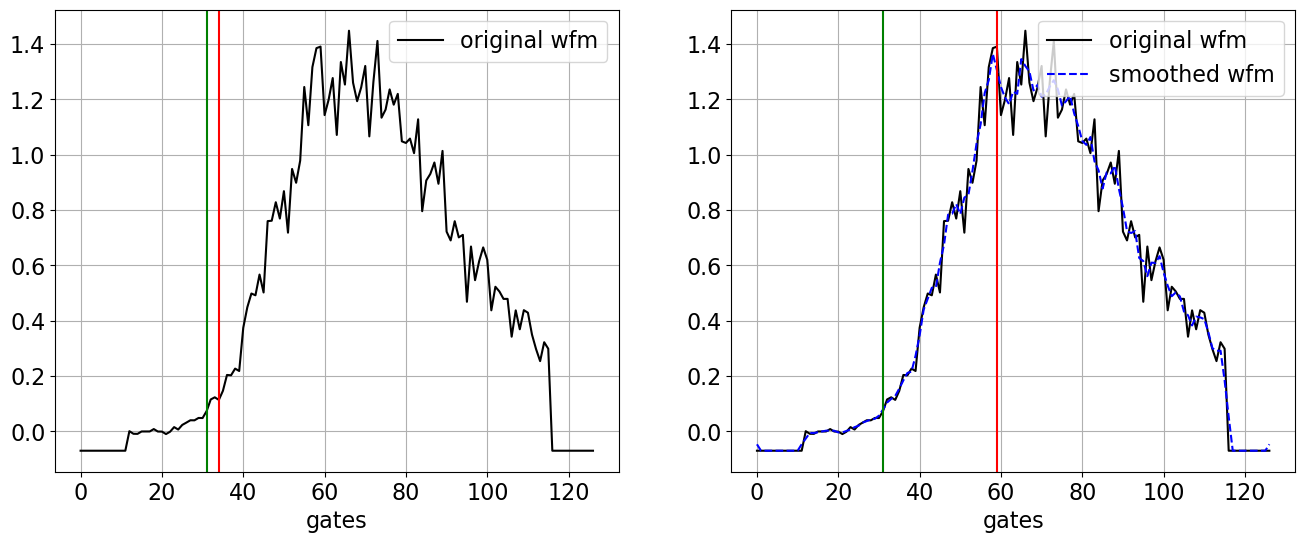

In [145]:
mpl.rcParams.update({'figure.figsize':(16,8),'font.size': 16})

fig,axs= plt.subplots(1,2,figsize=(16,6))
ax = axs[0]
# plt.plot(waveform,'-k')
# plt.plot(C,'--r')
ax.plot(wv0,'-k',label='original wfm')
# ax.plot(D,':b')
# ax.plot(wv,'--g')
ax.axvline(gate1_old,color='g')
ax.axvline(gate2_old,color='r')
ax.grid(True)
ax.legend(loc='upper right')
ax.set_xlabel('gates')

ax = axs[1]
# plt.plot(waveform,'-k')
# plt.plot(C,'--r')
ax.plot(wv0,'-k',label='original wfm')
# ax.plot(D,':b')
ax.plot(wv,'--b',label='smoothed wfm')
ax.axvline(gate1,color='g')
ax.axvline(gate2,color='r')
ax.grid(True)
ax.set_xlabel('gates')
ax.legend(loc='upper right')

In [71]:
x_initial=(edgestart-1)*tau;
sigma_initial=(edgeend-edgestart)*tau/(2*np.sqrt(2))
ampl_initial=2*np.mean(D[gate1:gate2])

Epoch_yang, Tau_yang, SWH_yang, Au_yang, Sigma0_yang, Sigma_yang,x1_yang,Err_yang = first_pass_retracking_ALES(D,xdata,x_initial,sigma_initial,\
                                                                                                               ampl_initial,gate1,gate2,\
                                                                                                               Err_tolerance_vector,startgate,\
                                                                                                               mission,total_gate_number)


growingdue =  0


In [67]:
SWH_yang=np.real(SWH_yang)
if SWH_yang<0:
    SWH_yang=0 # THE WHALES ALGORITHM IS DERIVED ONLY FOR POSITIVE SSB

stopgate = get_stopgate(SWH_yang,ALEScoeff0,ALEScoeff1,x1_yang,tau,total_gate_number,xdata,gate2)
stopgate

59

In [75]:
print(np.shape(xdata),total_gate_number)
print(np.ones(total_gate_number).shape)

(128,) 128
(128,)


In [68]:
x1_LESfive=np.empty(3)*np.nan #Initialisation of vector of the estimated parameters (LESfive corresponds to the second retracking)
exitflag_LESfive=0
Err_LESfive=1  
tol_Err_LESfive=Err_tolerance_vector

In [76]:
def get_weigths_forSWH(inputs,SWH_yang,total_gate_number,gate1):
    # In WHALES, for each value of SWH there is a corresponding set of weights, which are defined only from the start to the end of the 
    # leading edge of the synthetic waveforms generated in the Montecarlo simulation
    weigths_SWH_vector = np.arange(0,10.5,0.5)
    select_weights = np.argmin(np.abs(np.abs(SWH_yang)-weigths_SWH_vector)  )
    # -- Select the right line of weights
    weights_select = inputs['weights'][select_weights,:]
    index_nanweights = np.where(np.isnan(weights_select))[0]
    weights_select[index_nanweights] = 1 #Transform the NaNs of the weight vector in ones
    index_startweight = np.where(inputs['weights_flag'][select_weights,:]==1)[0] #identify the start and the end of the leading edge in the weight vector
    index_endweight = np.where(inputs['weights_flag'][select_weights,:]==2)[0]
    index_startweight = index_startweight[0] #convert array to index
    index_endweight = index_endweight[0] #convert array to index

    # Now prepare a weight vector considering the start of the leading edge in this waveform
    this_weights=np.ones(total_gate_number)
    if gate1+index_endweight-index_startweight < total_gate_number :
        this_weights[gate1:gate1+(index_endweight-index_startweight)] = weights_select[index_startweight:index_endweight]
        this_weights = 1./this_weights
    
    return this_weights

In [69]:
x_initial=(edgestart-1)*tau;
sigma_initial=(edgeend-edgestart)*tau/(2*np.sqrt(2))
ampl_initial=2*np.mean(D[gate1:gate2])
initial_conditions = np.array([x_initial, sigma_initial, ampl_initial])




def second_pass_retracking_ALES(D,xdata,initial_conditions, gate1, gate2, Err_tolerance_vector, startgate, stopgate,\
                                mission, total_gate_number,num_pass,SWH_yang=None):
    
    x1 = np.empty(3)*np.nan #Initialisation of vector of the estimated parameters (LESfive corresponds to the second retracking)
    tol_Err = Err_tolerance_vector
    
    exitflag_ales = 0
    Err_LE = 1
    growingdue = 0 #variation of the number of gates considered
    
    # x1_LESfive[1]=0 #initializing to start the while cycle
    if num_pass == 1:
        weightflag = 0
        maxgate = gate2
        namevar_wt = 'Wt_all_yang'
        
    elif num_pass == 2 :
        weightflag = 1
        maxgate = stopgate
        namevar_wt = 'Wt_all_LESfive'
        
    while (Err_LE > tol_Err) and ((maxgate + growingdue) < total_gate_number) and (initial_conditions[1] < 100) : #first while cycle: check on the Fitting Error
        
        if weightflag==1:
            this_weights = get_weigths_forSWH(inputs,SWH_yang,total_gate_number,gate1)
        else:
            this_weights=np.ones(total_gate_number)
        
        # Launches the retracking process
        x1, Wt_ales, exitflag_ales, Err, SWH = NMbrown_Sigma( xdata[startgate:maxgate+growingdue+1] ,\
                                                                           D[startgate:maxgate+growingdue+1],inputs['xi']*math.pi/180,\
                                                                           inputs['hsat'],initial_conditions,\
                                                                           mission,this_weights[startgate:maxgate+growingdue+1],weightflag)

        print(SWH,Err)
        outp[namevar_wt][startgate:maxgate+growingdue+1] = Wt_ales  #This is the fitted subwaveform
        
        if gate2>gate1+1 and gate1>0 and np.size(Wt_ales)>1 and gate1>startgate and gate2>startgate+1 :
            # Fitting error on the leading edge
            Err_LE = np.sqrt( 1/float(gate2-gate1-1) * np.sum( (D[gate1+1:gate2] - Wt_ales[gate1-(startgate-1):gate2-startgate])**2 ))
        
        if np.all(Wt_ales==0):
            Err_LE = 1   
        
        if exitflag_ales==0 : # and tol_Err==Err_tolerance_vector : 
        # --- if convergence is not reached, we might need more gates (growingdue+1), otherwise we prepare to terminate the while cycle
            growingdue=growingdue+2

        else: # then we can stop the while cycle
            growingdue = total_gate_number - maxgate; # equivalent to 'break'




        #END O

14.376115375893184 0.06341920954846593


In [48]:
if np.isnan(D[gate2])==0:
    # STEP 5: RETRACKING WITH THE ALES RETRACKER
    Epoch_yang, Tau_yang, SWH_yang, Au_yang, Sigma0_yang, Sigma_yang = first_pass_retracking_ALES(D,xdata,edgestart,edgeend,gate1,\
                                                                                                  gate2,Err_tolerance_vector,tau,\
                                                                                                  startgate,mission,total_gate_number)
    
    # STEP 5,3  WHALES EQUATION TO SET SECOND-PASS WINDOW: depending on the first estimation of SWH, a new width of the subwaveform is chosen, similarly 
                 #what is done in the ALES retracker (see Passaro et al. 2014 for the methodology). "stopgate" is the limit of the new subwaveform

    
    SWH_yang=np.real(SWH_yang)
    if SWH_yang<0:
        SWH_yang=0 # THE WHALES ALGORITHM IS DERIVED ONLY FOR POSITIVE SSB
    
    stopgate = get_stopgate(SWH_yang,ALEScoeff0,ALEScoeff1,x1_yang,tau,total_gate_number,xdata,gate2)

    # STEP 5.4 SECOND PASS RETRACKING 
    x1_LESfive=np.empty(3)*np.nan #Initialisation of vector of the estimated parameters (LESfive corresponds to the second retracking)
    exitflag_LESfive=0
    Err_LESfive=1  
    tol_Err_LESfive=Err_tolerance_vector

    if Err_yang<1: #To make it faster: If the first pass was not able to retrack the leading edge, it's useless to go on
            if Err_LESfive>tol_Err_LESfive:
                growingdue=0 #variation of the number of gates considered
                x1_LESfive[1]=0 #initializing to start the while cycle
                while Err_LESfive>tol_Err_LESfive and (stopgate+growingdue)<total_gate_number and sigma_initial<100 : #first while cycle: check on the Fitting Error

                    weightflag=1

                    #In WHALES, for each value of SWH there is a corresponding set of weights, which are defined only from the start to the end of the 
                    #leading edge of the synthetic waveforms generated in the Montecarlo simulation

                    #In the following lines,the closest value of SWH is searched in the table, considering the exit of the first pass
                    weigths_SWH_vector=np.arange(0,10.5,0.5)
                    select_weights=np.argmin(  np.abs(np.abs(SWH_yang)-weigths_SWH_vector)  )
                        #Select the right line of weights
                    weights_select=self.weights[select_weights,:]
                    index_nanweights=np.where(np.isnan(weights_select))[0]
                    weights_select[index_nanweights]=1 #Transform the NaNs of the weight vector in ones
                    index_startweight=np.where(self.weights_flag[select_weights,:]==1)[0] #identify the start and the end of the leading edge in the weight vector
                    index_endweight=np.where(self.weights_flag[select_weights,:]==2)[0]
                    index_startweight=index_startweight[0] #convert array to index
                    index_endweight=index_endweight[0] #convert array to index

                        #Now prepare a weight vector considering the start of the leading edge in this waveform
                    this_weights=np.ones(np.shape(xdata))
                    if gate1+index_endweight-index_startweight<total_gate_number :
                        this_weights[gate1:gate1+(index_endweight-index_startweight)]=weights_select[index_startweight:index_endweight]
                        this_weights=1./this_weights

                    # Launche the second retracking process
                    x1_LESfive, Wt_LESfive, exitflag_LESfive, Err, SWH =self.NMbrown_Sigma( xdata[startgate:stopgate+growingdue+1] , D[startgate:stopgate+growingdue+1],self.xi*math.pi/180,self.hsat,np.array([x_initial, sigma_initial, ampl_initial]),mission,this_weights[startgate:stopgate+growingdue+1],weightflag)

                    print(SWH,Err)
                    self.Wt_all_LESfive[startgate:stopgate+growingdue+1]=Wt_LESfive  #This is the fitted subwaveform


                    if gate2>gate1+1 and gate1>0 and np.size(Wt_LESfive)>1 and gate1>startgate and gate2>startgate+1 :
                         #Fitting error on the leading edge
                        Err_LESfive=np.sqrt( 1/float(gate2-gate1-1) * np.sum( (D[gate1+1:gate2]-Wt_LESfive[gate1-(startgate-1):gate2-startgate])**2 ))




                    if exitflag_LESfive==0 and tol_Err_LESfive==Err_tolerance_vector : #if convergence is not reached, we might need more gates (growingdue+1), otherwise we prepare to terminate the while cycle

                        growingdue=growingdue+2



                    else: # then we can stop the while cycle
                        growingdue=total_gate_number-gate2;




                    #END OF THE SECOND WHILE CYCLE

    stopgate=stopgate-1  #This is not used anymore
    
    if np.isnan(x1_LESfive[2])==0 :
        Epoch_LESfive,Tau_LESfive,Sigma_LESfive,Au_LESfive=self.Conversion_NMbrown(x1_LESfive,mission)
        SWH_LESfive=SWH

        Sigma0_LESfive=10*np.log10(Au_LESfive*normalize_factor)  #db
    else :
        Epoch_LESfive=np.nan 
        Tau_LESfive=np.nan
        SWH_LESfive=np.nan
        Au_LESfive=np.nan
        Sigma0_LESfive=np.nan 
        Sigma_LESfive=np.nan





# STEP 5.5 FINAL OUTPUT

#
if np.isnan(Epoch_LESfive)==0:

    self.Epoch=Epoch_LESfive
    self.SWH=SWH_LESfive  #in m
    self.Sigma=Sigma_LESfive #Rising time of the leading edge in ns
    self.Amplitude=Sigma0_LESfive#  Instead of the normalised amplitude(Au_LESfive), we are outputting the backscatter coefficient (before corrections)
    #self.Norm_Amplitude=Au_LESfive
    #self.leading_edge = np.nan
    self.Error = Err_LESfive  #Fitting Error on the leading edge

    self.range = self.uralt  + self.Epoch   #Range in m             

    #self.uncssh = self.hsat - self.range  #Can be removed
else:
    self.range = np.nan
    self.uncssh = np.nan            
    self.SWH=np.nan 
    self.Sigma=np.nan 
    self.Amplitude=np.nan 
    self.Norm_Amplitude=np.nan 
    #self.leading_edge = np.nan
    self.Error = np.nan 


self.model = self.Wt_all_LESfive.copy()*normalize_factor  #Fitted Waveform

8.836341180201527
27.516910283712708
32.09379064124943
0.013966111083645927
810071.9330411803
nan


In [37]:
for k in retracker.keys():
    print(k)


AttributeError: 'WHALES_withRangeAndEpoch' object has no attribute 'keys'

In [24]:
data['arr_0'].ndim

0

In [16]:
my_path_instr_corr_SWH = ''
my_path_weights = 'weights/weights_alt.mat'

mat_weights = matlab.loadmat(my_path_weights)


NotImplementedError: Please use HDF reader for matlab v7.3 files, e.g. h5py

In [5]:
def get_options():
    parser = argparse.ArgumentParser(
        description='Retrack a SGDR file with WHALES')
    parser.add_argument(
        '-m', '--mission', type=str,
        choices=['envisat', 'jason1', 'jason2', 'jason3', 'saral', 'cs2_lrm',
                 'jason3f'],
        help='satellite mission'
    )
    parser.add_argument(
        '-i', '--inputs', type=str,
        help='path to the SGDR file'
    )
    parser.add_argument(
        '-o', '--output', type=str, default='.',
        help='path to the output repository'
    )
    return parser.parse_args()

In [12]:
parser = argparse.ArgumentParser(
        description='Retrack a SGDR file with WHALES')

In [13]:
parser.parse_args(['-m','saral', '-i', filev1_40Hz, '-o', 'test.retrack.nc'])

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -m saral -i /home/datawork-cersat-public/provider/aviso/satellite/l2/saral/altika/sgdr/version_f/data/date/2013/095/SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113.CNES.nc -o test.retrack.nc


SystemExit: 2

/home/mdecarlo/mambaforge/envs/seastatecci_whales/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
%run python_WHALES_launcher -m 'saral' -i filev1_40Hz -o 'test.retrack.nc'

AttributeError: 'Dataset' object has no attribute 'value'